# Práctica Nº2 - Introducción al Control con Python
**Fecha**: Marzo 18-20/2025

## Descripción
SISTEMAS DESCRITOS EN FUNCIÓN DE TRANSFERENCIA EN 𝑆 Y 𝑍

## Requisitos
- Python 3.x
- Bibliotecas necesarias:
  - control
  - numpy
  - matplotlib

---
© 2025 Teoría de Control

In [ ]:
# Bibliotecas fundamentales para cálculo científico
import numpy as np                # Operaciones numéricas, arrays y matrices
import scipy.linalg as la         # Álgebra lineal avanzada
import scipy.optimize as opt      # Optimización y resolución de ecuaciones
import scipy.integrate as spi     # Integración numérica
from scipy import signal          # Procesamiento de señales y sistemas
import control as ctrl            # Análisis y diseño de sistemas de control
import matplotlib.pyplot as plt   # Creación de gráficos y visualizaciones

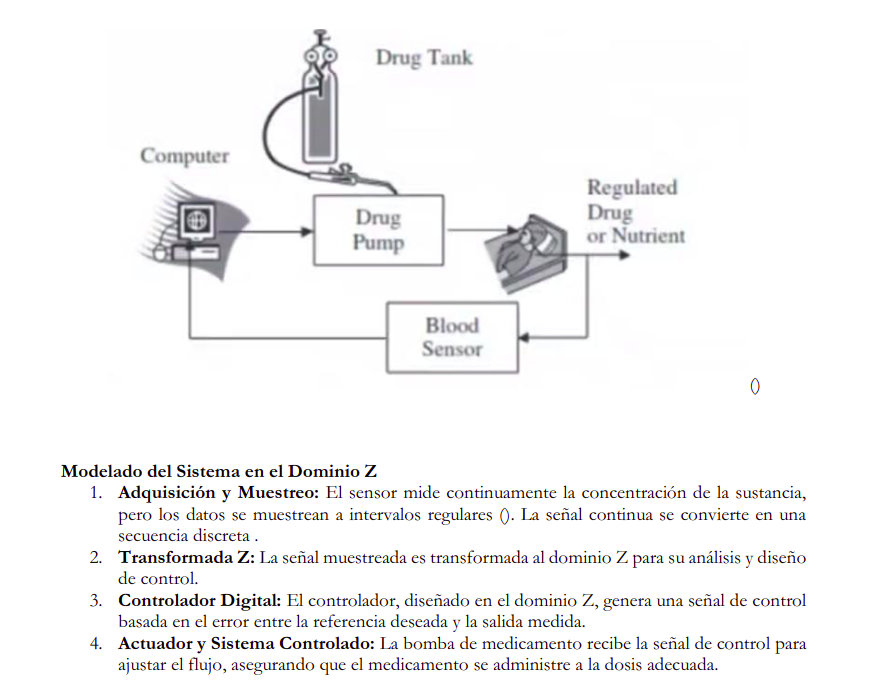

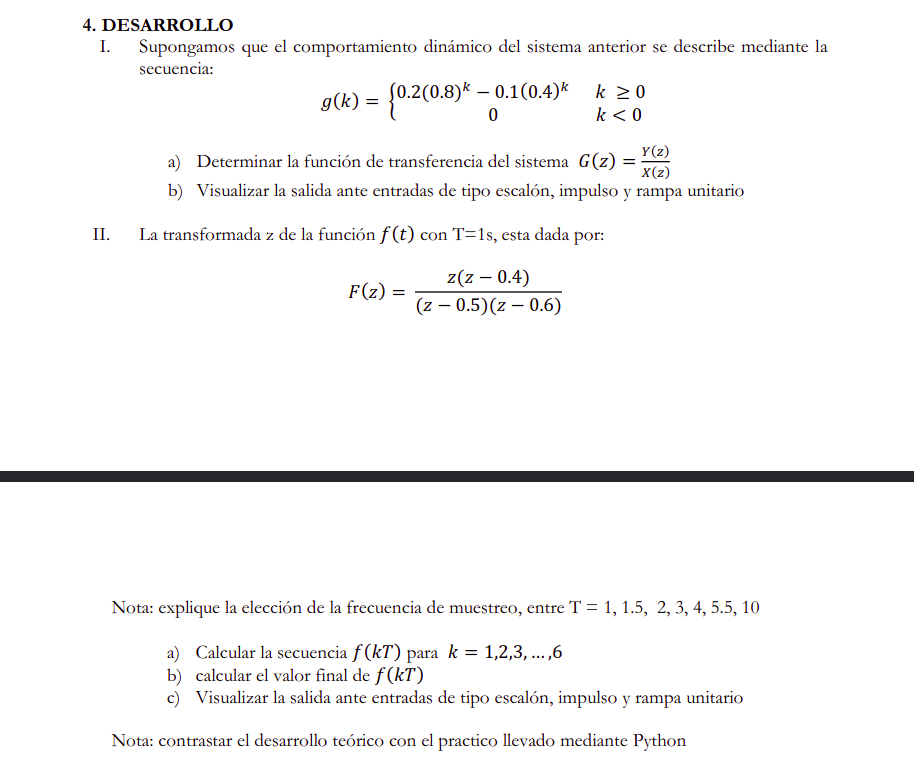

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, simplify, expand, factor

# Definir la variable simbólica z
z = symbols('z')

def calcular_funcion_transferencia():
    # Aplicamos la definición de la transformada Z:
    # G(z) = suma(g(k) * z^(-k)) para k desde 0 hasta infinito
    
    # Para g(k) = 0.2(0.8)^k - 0.1(0.4)^k
    # Tenemos dos términos que podemos separar por linealidad:
    
    # Primer término: 0.2(0.8)^k
    # Su transformada Z es: 0.2 / (1 - 0.8*z^(-1))
    primer_termino = 0.2 / (1 - 0.8/z)
    
    # Segundo término: -0.1(0.4)^k
    # Su transformada Z es: -0.1 / (1 - 0.4*z^(-1))
    segundo_termino = -0.1 / (1 - 0.4/z)
    
    # La función de transferencia es la suma de ambas transformadas
    G_z = primer_termino + segundo_termino
    
    # Multiplicamos por z/z para tener todo en términos de potencias positivas de z
    G_z = G_z * z/z
    
    # Simplificamos para obtener la forma estándar
    G_z_simplificado = simplify(G_z)
    
    # Expandimos para ver la forma del numerador y denominador
    G_z_expandido = expand(G_z_simplificado)
    
    # Factorizamos para tener la forma más compacta
    G_z_factorizado = factor(G_z_simplificado)
    
    return {
        'G_z': G_z,
        'G_z_simplificado': G_z_simplificado,
        'G_z_expandido': G_z_expandido,
        'G_z_factorizado': G_z_factorizado
    }

def graficar_respuesta_impulso(n_muestras=20):
    # Calculamos los valores de g(k)
    k = np.arange(n_muestras)
    g_k = 0.2 * (0.8 ** k) - 0.1 * (0.4 ** k)
    
    # Graficamos
    plt.figure(figsize=(10, 6))
    plt.stem(k, g_k, 'b', markerfmt='bo', linefmt='b-', basefmt='r-')
    plt.grid(True)
    plt.xlabel('k')
    plt.ylabel('g(k)')
    plt.title('Respuesta al impulso g(k)')
    plt.tight_layout()
    plt.show()
    
    return g_k

# Calcular la función de transferencia
resultado = calcular_funcion_transferencia()

# Mostrar resultados
print("Función de transferencia G(z):")
print(resultado['G_z_factorizado'])



Función de transferencia G(z):
0.1*z**2/((1.0*z - 0.8)*(1.0*z - 0.4))


Simulando respuesta al impulso unitario:


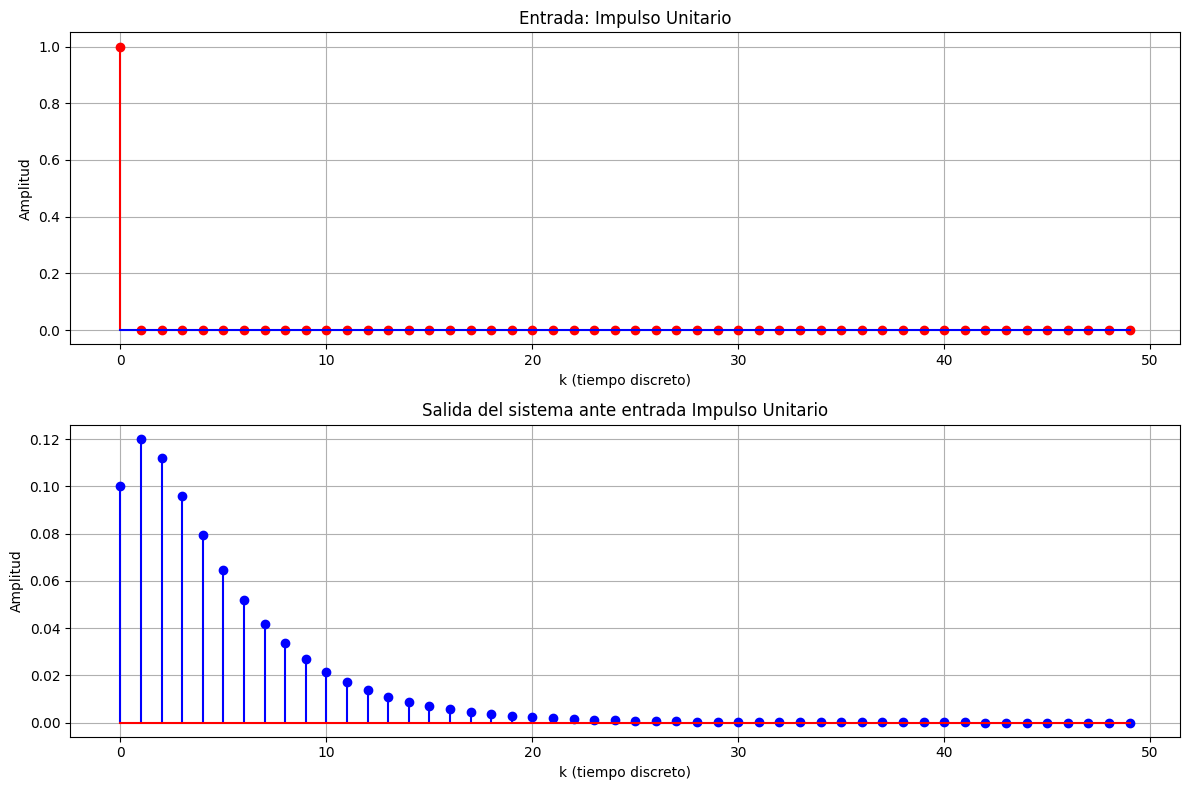


Simulando respuesta al escalón unitario:


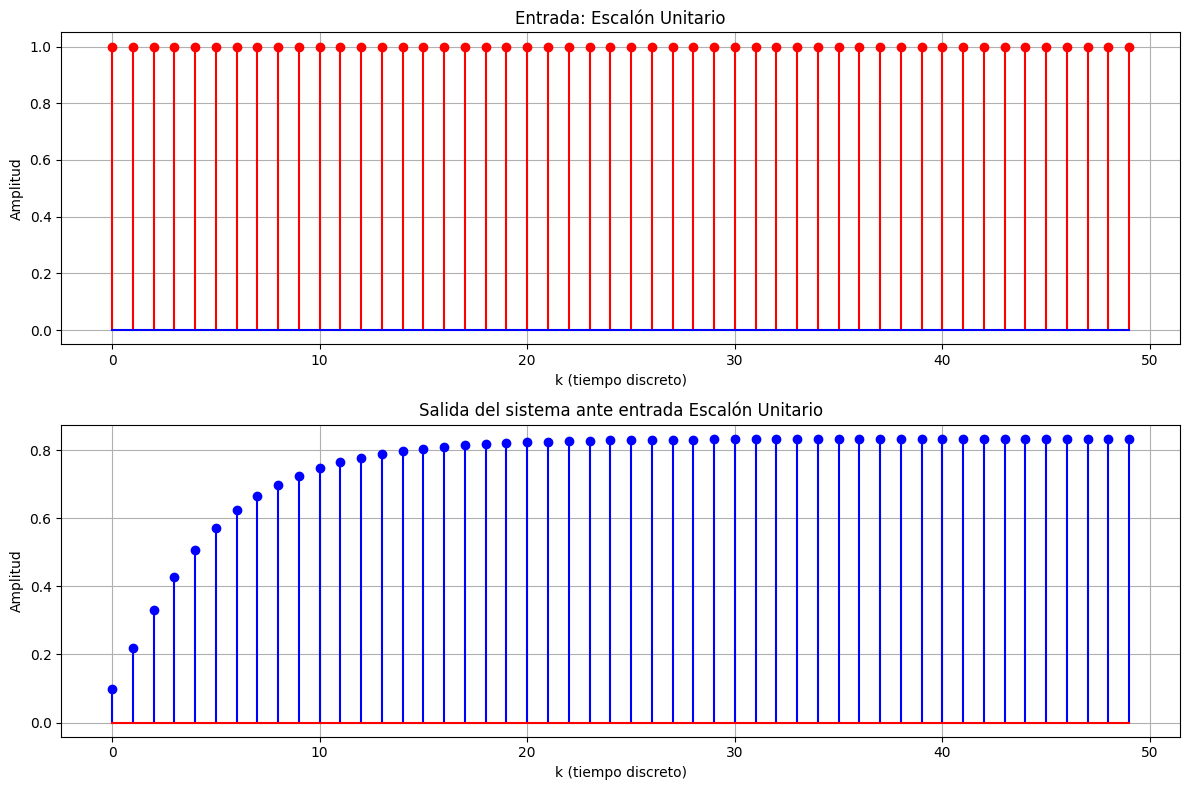


Simulando respuesta a la rampa unitaria:


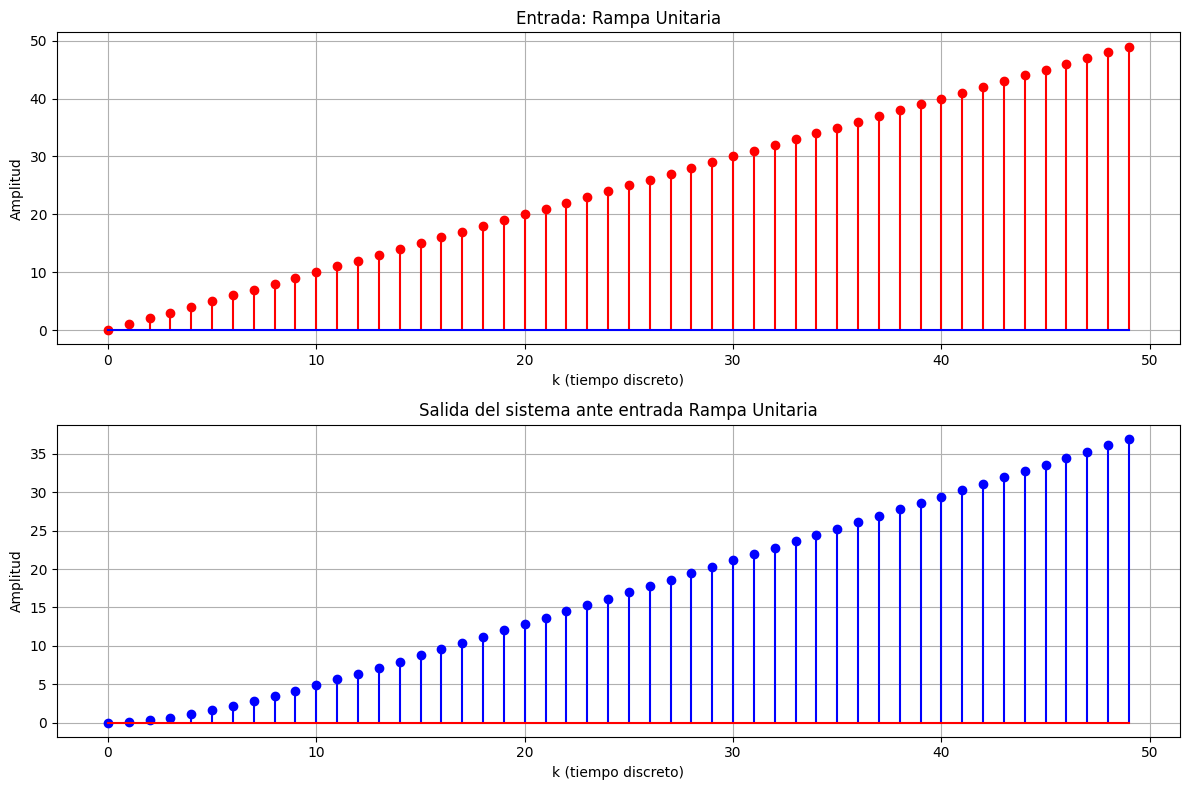

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import control

# Definimos la función de transferencia G(z) = 0.1z²/[(z - 0.8)(z - 0.4)]
# En términos de coeficientes para scipy:
# Numerador: [0.1, 0, 0] (0.1z² = 0.1z²)
# Denominador: [1, -1.2, 0.32] ((z - 0.8)(z - 0.4) = z² - 1.2z + 0.32)
num = [0.1, 0, 0]  # Coeficientes del numerador
den = [1, -1.2, 0.32]  # Coeficientes del denominador
system = signal.TransferFunction(num, den, dt=1)

# Función para simular la respuesta del sistema a una entrada
def simular_respuesta(entrada, nombre_entrada, n_muestras=50):
    # Obtenemos la respuesta del sistema
    t_out, y_out = signal.dlsim(system, entrada)
    
    # Creamos la figura
    plt.figure(figsize=(12, 8))
    
    # Graficamos la entrada
    plt.subplot(2, 1, 1)
    plt.stem(np.arange(len(entrada)), entrada, 'r', markerfmt='ro', linefmt='r-', basefmt='b-')
    plt.grid(True)
    plt.title(f'Entrada: {nombre_entrada}')
    plt.xlabel('k (tiempo discreto)')
    plt.ylabel('Amplitud')
    
    # Graficamos la salida
    plt.subplot(2, 1, 2)
    plt.stem(np.arange(len(y_out)), y_out, 'b', markerfmt='bo', linefmt='b-', basefmt='r-')
    plt.grid(True)
    plt.title(f'Salida del sistema ante entrada {nombre_entrada}')
    plt.xlabel('k (tiempo discreto)')
    plt.ylabel('Amplitud')
    
    plt.tight_layout()
    plt.show()
    
    return y_out

# Creamos las entradas estándar
n_muestras = 50
k = np.arange(n_muestras)

# 1. Impulso unitario: δ[k] = 1 para k=0, 0 en caso contrario
impulso = np.zeros(n_muestras)
impulso[0] = 1

# 2. Escalón unitario: u[k] = 1 para k≥0, 0 en caso contrario
escalon = np.ones(n_muestras)

# 3. Rampa unitaria: r[k] = k para k≥0, 0 en caso contrario
rampa = k

# Verificación alternativa usando la respuesta al impulso
def verificar_con_respuesta_impulso():
    # Calculamos la respuesta al impulso explícitamente usando la fórmula dada
    k_vals = np.arange(n_muestras)
    g_k = 0.2 * (0.8 ** k_vals) - 0.1 * (0.4 ** k_vals)
    
    # Para el escalón, la respuesta es la suma acumulada de g[k]
    escalon_resp = np.zeros(n_muestras)
    for n in range(n_muestras):
        escalon_resp[n] = sum(g_k[:n+1])
    
    # Para la rampa, la respuesta es más compleja
    rampa_resp = np.zeros(n_muestras)
    for n in range(n_muestras):
        for m in range(n+1):
            rampa_resp[n] += m * g_k[n-m]
    
    # Graficamos estas respuestas para comparación
    plt.figure(figsize=(12, 10))
    
    # Respuesta al impulso
    plt.subplot(3, 1, 1)
    plt.stem(k_vals, g_k, 'b', markerfmt='bo', linefmt='b-', basefmt='r-')
    plt.grid(True)
    plt.title('Respuesta al impulso (g[k])')
    plt.xlabel('k')
    plt.ylabel('Amplitud')
    
    # Respuesta al escalón
    plt.subplot(3, 1, 2)
    plt.stem(k_vals, escalon_resp, 'b', markerfmt='bo', linefmt='b-', basefmt='r-')
    plt.grid(True)
    plt.title('Respuesta al escalón (mediante convolución)')
    plt.xlabel('k')
    plt.ylabel('Amplitud')
    
    # Respuesta a la rampa
    plt.subplot(3, 1, 3)
    plt.stem(k_vals, rampa_resp, 'b', markerfmt='bo', linefmt='b-', basefmt='r-')
    plt.grid(True)
    plt.title('Respuesta a la rampa (mediante convolución)')
    plt.xlabel('k')
    plt.ylabel('Amplitud')
    
    plt.tight_layout()
    plt.show()
    
    return g_k, escalon_resp, rampa_resp

# También podemos usar la función step de scipy para verificar la respuesta al escalón
# y comparar con nuestro método
def verificar_con_step():
    time_step, step_response = signal.dstep(system, n=n_muestras)
    step_response = step_response[0]  # Extraemos los valores
    
    plt.figure(figsize=(10, 6))
    plt.stem(np.arange(len(step_response)), step_response, 'g', markerfmt='go', linefmt='g-', basefmt='r-')
    plt.grid(True)
    plt.title('Respuesta al escalón (usando signal.dstep)')
    plt.xlabel('k')
    plt.ylabel('Amplitud')
    plt.tight_layout()
    plt.show()
    
    return step_response

# Ejecutamos las simulaciones
print("Simulando respuesta al impulso unitario:")
y_impulso = simular_respuesta(impulso, "Impulso Unitario")

print("\nSimulando respuesta al escalón unitario:")
y_escalon = simular_respuesta(escalon, "Escalón Unitario")

print("\nSimulando respuesta a la rampa unitaria:")
y_rampa = simular_respuesta(rampa, "Rampa Unitaria")



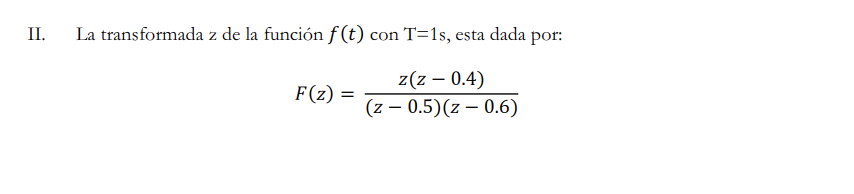

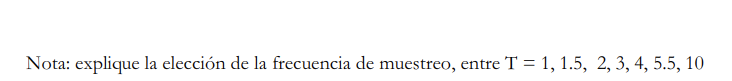

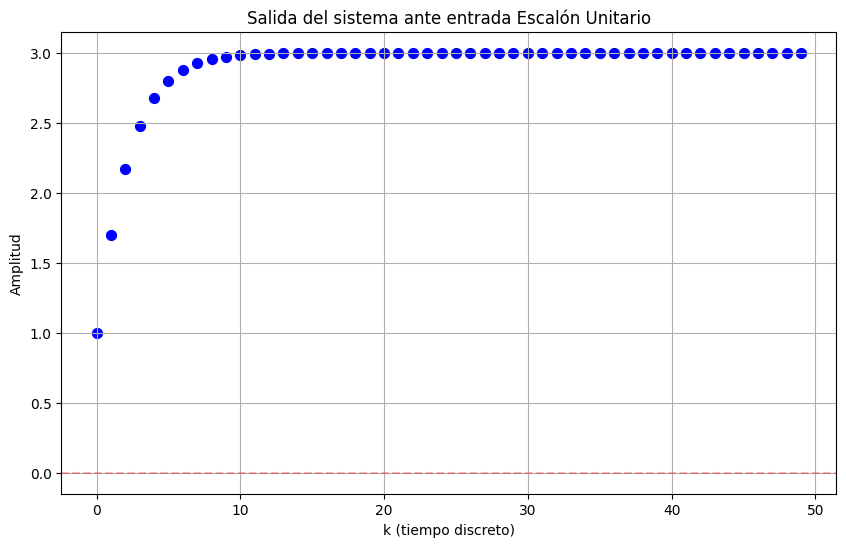

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Definir la función de transferencia en z
# F(z) = z(z-0.4)/((z-0.5)(z-0.6))
numerator = [1, -0.4, 0]  # Coeficientes de z(z-0.4)
denominator = [1, -1.1, 0.3]  # Coeficientes de (z-0.5)(z-0.6)

# Crear el sistema discreto con T=1s
system = signal.dlti(numerator, denominator, dt=1)

# Crear una entrada de escalón unitario
t = np.arange(0, 50, 1)  # 50 muestras para ver más de la respuesta
step_input = np.ones_like(t)  # Entrada escalón unitario

# Calcular la respuesta del sistema al escalón
t_out, y_out = signal.dlsim(system, step_input)

# Graficar solo los puntos sin líneas conectoras
plt.figure(figsize=(10, 6))
plt.scatter(t_out, y_out, color='blue', s=50, marker='o')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.grid(True)
plt.xlabel('k (tiempo discreto)')
plt.ylabel('Amplitud')
plt.title('Salida del sistema ante entrada Escalón Unitario')
plt.show()

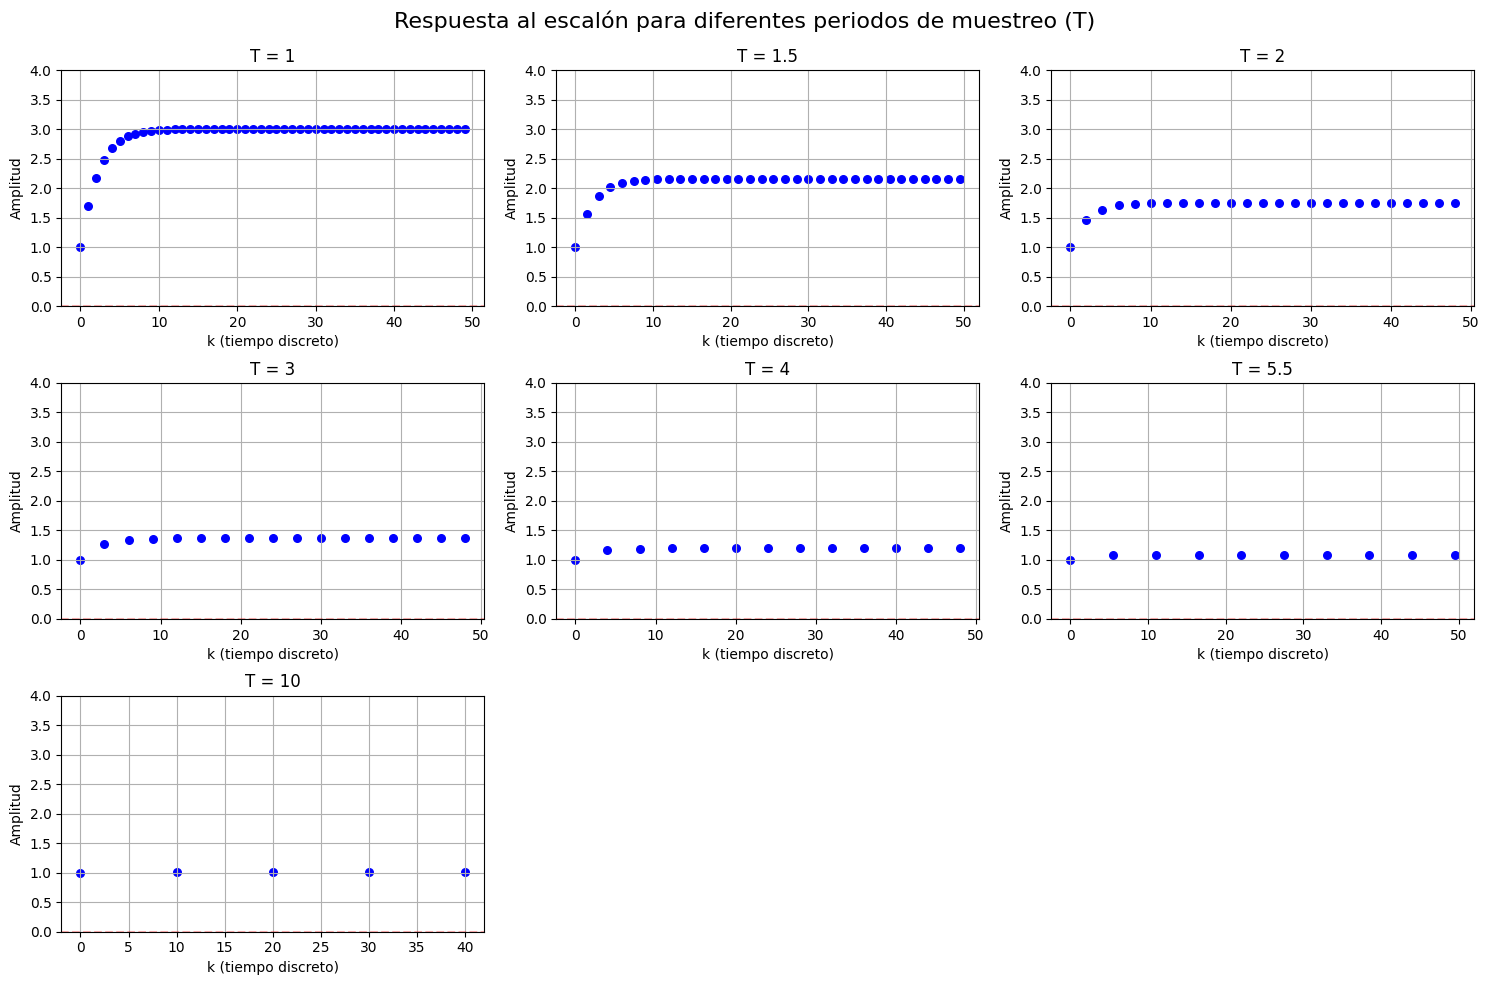

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Valores de T (periodos de muestreo)
T_values = [1, 1.5, 2, 3, 4, 5.5, 10]

# Parámetros ajustables
t_max = 50  # Tiempo máximo de simulación
y_min = 0  # Límite inferior del eje y
y_max = 4  # Límite superior del eje y - AJUSTA ESTE VALOR SEGÚN NECESITES

# Crear una figura con subplots
plt.figure(figsize=(15, 10))

for i, T in enumerate(T_values):
    # Convertir la función de transferencia para diferentes valores de T
    pole1 = np.exp(np.log(0.5) * T)
    pole2 = np.exp(np.log(0.6) * T)
    zero = np.exp(np.log(0.4) * T)
    
    # Definir la función de transferencia en z
    numerator = [1, -zero, 0]  # Coeficientes de z(z-zero)
    denominator = [1, -(pole1 + pole2), pole1*pole2]  # Coeficientes de (z-pole1)(z-pole2)
    
    # Crear el sistema discreto
    system = signal.dlti(numerator, denominator, dt=T)
    
    # Crear una entrada de escalón unitario
    t = np.arange(0, t_max, T)
    step_input = np.ones_like(t)
    
    # Calcular la respuesta del sistema al escalón
    t_out, y_out = signal.dlsim(system, step_input)
    
    # Crear subplot
    plt.subplot(3, 3, i+1)
    plt.scatter(t_out, y_out, color='blue', s=30, marker='o')
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
    plt.grid(True)
    plt.title(f'T = {T}')
    plt.xlabel('k (tiempo discreto)')
    plt.ylabel('Amplitud')
    
    # Establecer límites fijos para el eje y
    plt.ylim(y_min, y_max)

plt.tight_layout()
plt.suptitle('Respuesta al escalón para diferentes periodos de muestreo (T)', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()

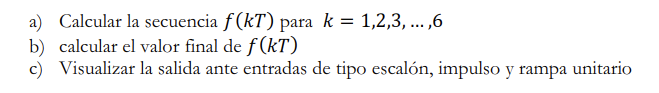


Valores de la secuencia f[k]:
  k |         f[k]
------------------
  1 |     0.470000
  2 |     0.307000
  3 |     0.196700
  4 |     0.124270
  5 |     0.077687
  6 |     0.048175

Valor final aproximado de la secuencia para k→∞: f[100] = 0.000000


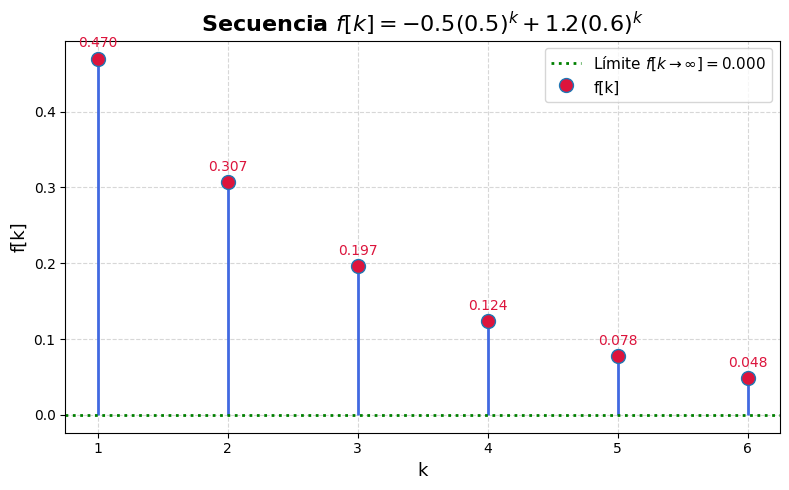

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def f_k(k):
    """Calcula la secuencia f[k] = -0.5*(0.5)^k + 1.2*(0.6)^k."""
    return -0.5 * (0.5)**k + 1.2 * (0.6)**k

def mostrar_valores(k_values, f_values):
    print("\nValores de la secuencia f[k]:")
    print(f"{'k':>3} | {'f[k]':>12}")
    print("-" * 18)
    for k, val in zip(k_values, f_values):
        print(f"{k:>3} | {val:12.6f}")

def calcular_limite(k):
    valor = f_k(k)
    return 0.0 if abs(valor) < 1e-10 else valor

def graficar_secuencia(k_values, f_values, k_final, f_final):
    plt.figure(figsize=(8, 5))
    markerline, stemlines, baseline = plt.stem(
        k_values, f_values, basefmt=" ", label="f[k]"
    )
    plt.setp(markerline, markerfacecolor='crimson', markersize=10)
    plt.setp(stemlines, color='royalblue', linewidth=2)
    plt.title("Secuencia $f[k] = -0.5(0.5)^k + 1.2(0.6)^k$", fontsize=16, fontweight='bold')
    plt.xlabel("k", fontsize=13)
    plt.ylabel("f[k]", fontsize=13)
    plt.xticks(k_values)
    plt.grid(True, linestyle='--', alpha=0.5)

    # Anotar los valores sobre los puntos
    for k, y in zip(k_values, f_values):
        plt.annotate(f"{y:.3f}", (k, y), textcoords="offset points", xytext=(0,8), ha='center', fontsize=10, color='crimson')

    # Línea horizontal para el valor límite
    plt.axhline(f_final, color='green', linestyle=':', linewidth=2, label=f"Límite $f[k\\to\\infty]={f_final:.3f}$")
    plt.legend(fontsize=11)
    plt.tight_layout()
    plt.show()

def main():
    k_values = np.arange(1, 7)
    f_values = f_k(k_values)
    mostrar_valores(k_values, f_values)

    k_final = 100
    f_final = calcular_limite(k_final)
    print(f"\nValor final aproximado de la secuencia para k→∞: f[{k_final}] = {f_final:.6f}")

    graficar_secuencia(k_values, f_values, k_final, f_final)

if __name__ == "__main__":
    main()

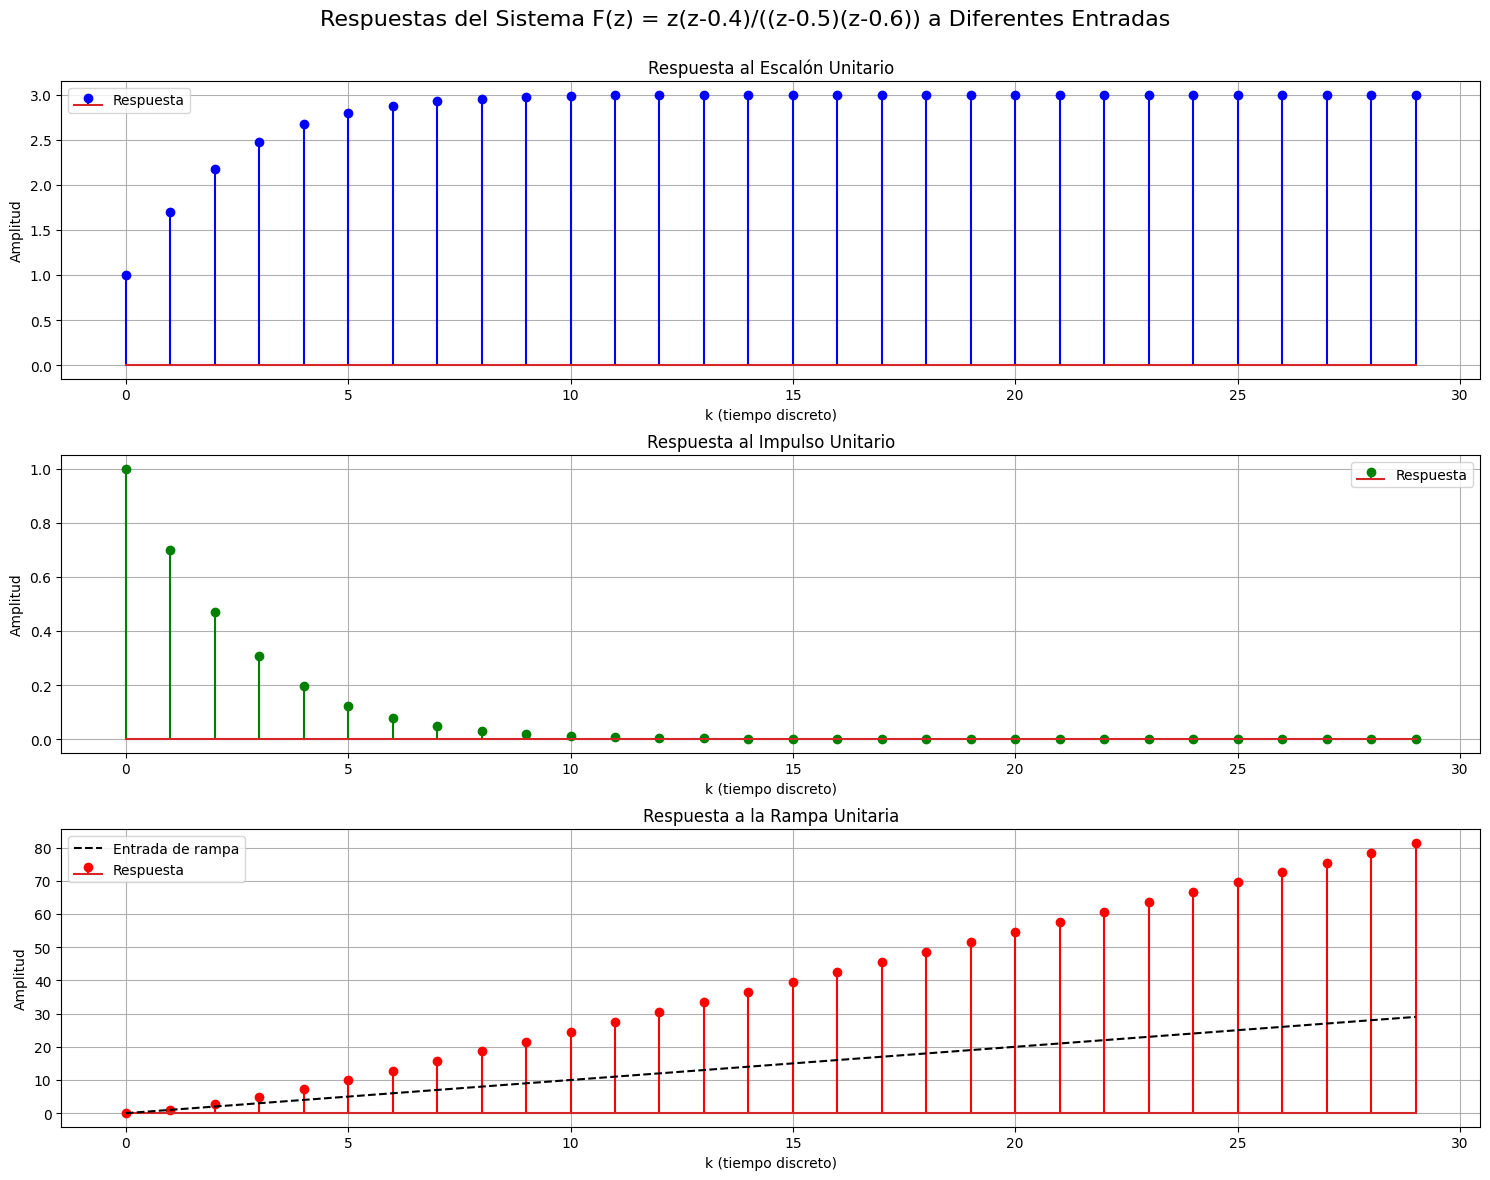

In [6]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Definir la función de transferencia en z
# F(z) = z(z-0.4)/((z-0.5)(z-0.6))
numerator = [1, -0.4, 0]  # Coeficientes de z(z-0.4)
denominator = [1, -1.1, 0.3]  # Coeficientes de (z-0.5)(z-0.6)

# Crear el sistema discreto
system = signal.dlti(numerator, denominator, dt=1)

# Tiempo de simulación
t_sim = np.arange(0, 30)

# Crear las diferentes entradas
# Escalón unitario
step_input = np.ones_like(t_sim)

# Impulso unitario
impulse_input = np.zeros_like(t_sim)
impulse_input[0] = 1

# Rampa unitaria
ramp_input = t_sim

# Calcular las respuestas del sistema
t_out, step_response = signal.dlsim(system, step_input)
t_out, impulse_response = signal.dlsim(system, impulse_input)
t_out, ramp_response = signal.dlsim(system, ramp_input)

# Crear una figura con 3 subplots para mostrar las respuestas
plt.figure(figsize=(15, 12))

# 1. Respuesta al escalón
plt.subplot(3, 1, 1)
plt.stem(t_out, step_response, 'b', markerfmt='bo', label='Respuesta')
plt.grid(True)
plt.xlabel('k (tiempo discreto)')
plt.ylabel('Amplitud')
plt.title('Respuesta al Escalón Unitario')
plt.legend()

# 2. Respuesta al impulso
plt.subplot(3, 1, 2)
plt.stem(t_out, impulse_response, 'g', markerfmt='go', label='Respuesta')
plt.grid(True)
plt.xlabel('k (tiempo discreto)')
plt.ylabel('Amplitud')
plt.title('Respuesta al Impulso Unitario')
plt.legend()

# 3. Respuesta a la rampa
plt.subplot(3, 1, 3)
plt.stem(t_out, ramp_response, 'r', markerfmt='ro', label='Respuesta')
plt.plot(t_out, ramp_input, 'k--', label='Entrada de rampa')
plt.grid(True)
plt.xlabel('k (tiempo discreto)')
plt.ylabel('Amplitud')
plt.title('Respuesta a la Rampa Unitaria')
plt.legend()

plt.tight_layout()
plt.suptitle('Respuestas del Sistema F(z) = z(z-0.4)/((z-0.5)(z-0.6)) a Diferentes Entradas', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()